In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
airlines=pd.read_csv('./Downloads/Kaggle/airlines.csv')
airports=pd.read_csv('./Downloads/Kaggle/airports.csv')
flights=pd.read_csv('./Downloads/Kaggle/flights.csv',low_memory=False)


In [3]:
airports["COUNTRY"].unique()


array(['USA'], dtype=object)

In [4]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [5]:
flights[flights.AIRLINE_DELAY==0]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,...,607.0,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0
30,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,...,632.0,43.0,0,0,NaN,43.0,0.0,0.0,0.0,0.0
50,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,...,520.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0
70,2015,1,1,4,AA,1057,N3ASAA,DFW,MIA,515,...,1038.0,102.0,0,0,NaN,0.0,0.0,0.0,0.0,102.0
106,2015,1,1,4,DL,824,N3736C,PHX,DTW,540,...,1331.0,128.0,0,0,NaN,0.0,0.0,0.0,0.0,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818772,2015,12,31,4,F9,1122,N920FR,LAS,CVG,2155,...,516.0,41.0,0,0,NaN,0.0,0.0,0.0,41.0,0.0
5818775,2015,12,31,4,NK,304,N662NK,MCO,ACY,2155,...,143.0,104.0,0,0,NaN,0.0,0.0,0.0,104.0,0.0
5818844,2015,12,31,4,AA,602,N935UW,CLT,PHX,2210,...,101.0,16.0,0,0,NaN,16.0,0.0,0.0,0.0,0.0
5818876,2015,12,31,4,F9,427,N928FR,ATL,DEN,2225,...,209.0,119.0,0,0,NaN,0.0,0.0,0.0,119.0,0.0


In [6]:
Airline_delay=flights[flights.AIRLINE_DELAY>0].copy()
Airline_delay.AIRLINE_DELAY=1
Airline_delay.AIRLINE_DELAY.unique()

array([1], dtype=int64)

In [7]:
Delayed=Airline_delay.groupby(Airline_delay.AIRLINE).sum()["AIRLINE_DELAY"].copy()

In [8]:
#Delayed.sort_values(ascending=False,inplace=True)
Delayed

AIRLINE
AA     68656
AS      8363
B6     38665
DL     63128
EV     53943
F9     11517
HA      7395
MQ     27236
NK     17307
OO     39127
UA     65999
US     19717
VX      4445
WN    144524
Name: AIRLINE_DELAY, dtype: int64

In [9]:
Delayed.sum()

570022

In [10]:
bools=flights.AIRLINE_DELAY==0
bools
bools2=flights.AIRLINE_DELAY.isna()
bools2
No_airline_delay=flights[bools+bools2].copy()

In [11]:
No_airline_delay

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
4755640+493417 


5249057

In [13]:
No_airline_delay.AIRLINE_DELAY=1

In [14]:
No_delay=No_airline_delay.groupby(by=flights.AIRLINE).sum()["AIRLINE_DELAY"].copy()

In [15]:
No_delay

AIRLINE
AA     657328
AS     164158
B6     228383
DL     812753
EV     518034
F9      79319
HA      68877
MQ     267396
NK     100072
OO     549226
UA     449724
US     178998
VX      57458
WN    1117331
Name: AIRLINE_DELAY, dtype: int64

In [16]:
percentage_flights_delayed=(Delayed/(No_delay+Delayed))*100

In [17]:
percentage_flights_delayed.values

array([ 9.45695773,  4.84752581, 14.4786705 ,  7.20737178,  9.43097362,
       12.67889383,  9.69556325,  9.24407396, 14.74454545,  6.65025928,
       12.79737378,  9.92225046,  7.18058899, 11.45329693])

In [18]:
Airlines_delay=pd.concat({"Flights Delayed by Airline":Delayed,"Flights not Delayed by Airline":No_delay,"Percentage of Flights Delayed":percentage_flights_delayed},axis=1)

In [19]:
Airlines_delay

,Flights Delayed by Airline,Flights not Delayed by Airline,Percentage of Flights Delayed
AIRLINE,,,
AA,68656,657328,9.456958
AS,8363,164158,4.847526
B6,38665,228383,14.478671
DL,63128,812753,7.207372
EV,53943,518034,9.430974
F9,11517,79319,12.678894
HA,7395,68877,9.695563
MQ,27236,267396,9.244074
NK,17307,100072,14.744545


In [20]:
#the index in created DataFrame is in Alphabetical Order
airline_names=airlines.sort_values("IATA_CODE")["AIRLINE"]
airline_names

1           American Airlines Inc.
6             Alaska Airlines Inc.
4                  JetBlue Airways
9             Delta Air Lines Inc.
10     Atlantic Southeast Airlines
3           Frontier Airlines Inc.
11          Hawaiian Airlines Inc.
12    American Eagle Airlines Inc.
7                 Spirit Air Lines
5            Skywest Airlines Inc.
0            United Air Lines Inc.
2                  US Airways Inc.
13                  Virgin America
8           Southwest Airlines Co.
Name: AIRLINE, dtype: object

In [21]:
Airlines_delay.index=airline_names

In [22]:
Airlines_delay.sort_values("Percentage of Flights Delayed",inplace=True)

In [23]:
Airlines_delay

,Flights Delayed by Airline,Flights not Delayed by Airline,Percentage of Flights Delayed
AIRLINE,,,
Alaska Airlines Inc.,8363,164158,4.847526
Skywest Airlines Inc.,39127,549226,6.650259
Virgin America,4445,57458,7.180589
Delta Air Lines Inc.,63128,812753,7.207372
American Eagle Airlines Inc.,27236,267396,9.244074
Atlantic Southeast Airlines,53943,518034,9.430974
American Airlines Inc.,68656,657328,9.456958
Hawaiian Airlines Inc.,7395,68877,9.695563
US Airways Inc.,19717,178998,9.922250


In [24]:
Airlines_delay.iloc[:,2].mean()

9.984881812277633

In [25]:
#plt.barh(Airlines_delay.index,Airlines_delay.iloc[:,2].values)
#plt.xlabel("Percentage of flights delayed due to Airline problems")
#plt.ylabel("Name of Airline")
#plt.title("Airlines which perform better than the Average")
#plt.show()

In [26]:
col=(Airlines_delay["Percentage of Flights Delayed"]<10)
'''plt.barh(Airlines_delay.index,Airlines_delay.iloc[:,2].values,color=col)
plt.xlabel("Percentage of flights delayed due to Airline problems")
plt.ylabel("Name of Airline")
plt.title("Airlines which perform better than the Average")
plt.show()'''

'plt.barh(Airlines_delay.index,Airlines_delay.iloc[:,2].values,color=col)\nplt.xlabel("Percentage of flights delayed due to Airline problems")\nplt.ylabel("Name of Airline")\nplt.title("Airlines which perform better than the Average")\nplt.show()'

In [27]:
col


AIRLINE
Alaska Airlines Inc.             True
Skywest Airlines Inc.            True
Virgin America                   True
Delta Air Lines Inc.             True
American Eagle Airlines Inc.     True
Atlantic Southeast Airlines      True
American Airlines Inc.           True
Hawaiian Airlines Inc.           True
US Airways Inc.                  True
Southwest Airlines Co.          False
Frontier Airlines Inc.          False
United Air Lines Inc.           False
JetBlue Airways                 False
Spirit Air Lines                False
Name: Percentage of Flights Delayed, dtype: bool

In [28]:
col[col]='tab:blue'

In [29]:
col

AIRLINE
Alaska Airlines Inc.            tab:blue
Skywest Airlines Inc.           tab:blue
Virgin America                  tab:blue
Delta Air Lines Inc.            tab:blue
American Eagle Airlines Inc.    tab:blue
Atlantic Southeast Airlines     tab:blue
American Airlines Inc.          tab:blue
Hawaiian Airlines Inc.          tab:blue
US Airways Inc.                 tab:blue
Southwest Airlines Co.             False
Frontier Airlines Inc.             False
United Air Lines Inc.              False
JetBlue Airways                    False
Spirit Air Lines                   False
Name: Percentage of Flights Delayed, dtype: object

In [30]:
col[col==False]='lightgrey'

In [31]:
col=col[::-1]


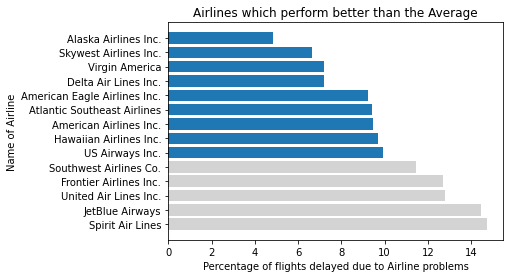

In [32]:
plt.barh(Airlines_delay.index[::-1],Airlines_delay.iloc[::-1,2].values,color=col)
plt.xlabel("Percentage of flights delayed due to Airline problems")
plt.ylabel("Name of Airline")

plt.title("Airlines which perform better than the Average")
plt.show()

In [33]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [34]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
#general queries not related to delays

In [36]:
months=flights.groupby("MONTH").count()["YEAR"].copy()

In [37]:
months.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [38]:
months


Jan    469968
Feb    429191
Mar    504312
Apr    485151
May    496993
Jun    503897
Jul    520718
Aug    510536
Sep    464946
Oct    486165
Nov    467972
Dec    479230
Name: YEAR, dtype: int64

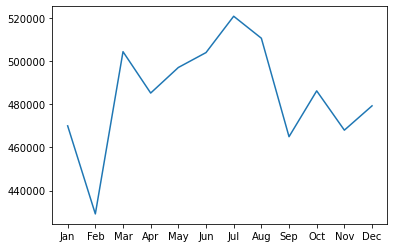

In [39]:
plt.plot(months)

In [40]:
days=flights.groupby("DAY_OF_WEEK").count()["YEAR"]

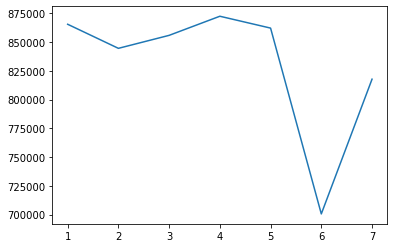

In [41]:
plt.plot(days)



In [42]:
flights.columns


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [43]:
#flights=pd.read_csv('./Downloads/Kaggle/flights.csv',low_memory=False)
can_flights=flights[flights.CANCELLED==1]
#plt.pie(flights.ORIGIN_AIRPORT)

In [44]:
can_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,NaN,IAH,TPA,1955,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015,12,31,4,UA,222,NaN,SFO,LAX,2000,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,2019,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,2155,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [45]:
# Seeing which Airline has the most cancelled Flights
can_airline=flights.groupby("AIRLINE").count()

In [46]:
can_airline=can_airline["CANCELLED"]

In [47]:
sorted_airline=can_airline.sort_values(ascending=True)

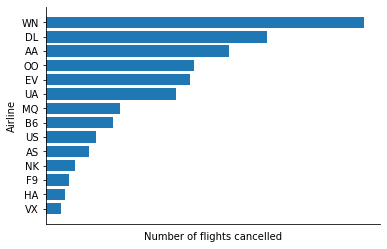

In [48]:
#fig = plt.figure(figsize =(15, 7))
ax=plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.barh(sorted_airline.index,sorted_airline.values)
plt.xlabel("Number of flights cancelled")
plt.ylabel("Airline")
plt.show()

In [49]:
can_flights_reason=can_flights.CANCELLATION_REASON.replace('A','Airline').replace('B','Weather').replace('C','National air system').replace('D','Security')

In [50]:
can_flights_reason.value_counts()

Weather                48851
Airline                25262
National air system    15749
Security                  22
Name: CANCELLATION_REASON, dtype: int64

Text(0.5, 1.0, 'Airline Delays are responsible for the most cancellations')

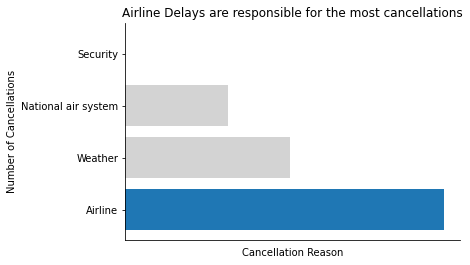

In [51]:
ax=plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().set_ticks([])
#ax.get_yaxis().set_ticks([])
plt.barh(can_flights_reason.unique(),can_flights_reason.value_counts(),color=['tab:blue','lightgray','lightgray','lightgray'])
plt.xlabel("Cancellation Reason")
plt.ylabel("Number of Cancellations")
plt.title("Airline Delays are responsible for the most cancellations")

In [52]:
print(flights.DEPARTURE_DELAY.mean())
threshold=flights.DEPARTURE_DELAY.quantile(q=0.98) # removing the top 2% values to improve visulaisations
plot_delay=flights.DEPARTURE_DELAY[flights.DEPARTURE_DELAY<=threshold]
#print(plot_delay.mean())
flights.DEPARTURE_DELAY.value_counts()

9.370158275198389


-3.0       455407
-4.0       444053
-5.0       438844
-2.0       435237
-1.0       387475
            ...  
 1079.0         1
 1347.0         1
-61.0           1
 859.0          1
 1649.0         1
Name: DEPARTURE_DELAY, Length: 1217, dtype: int64

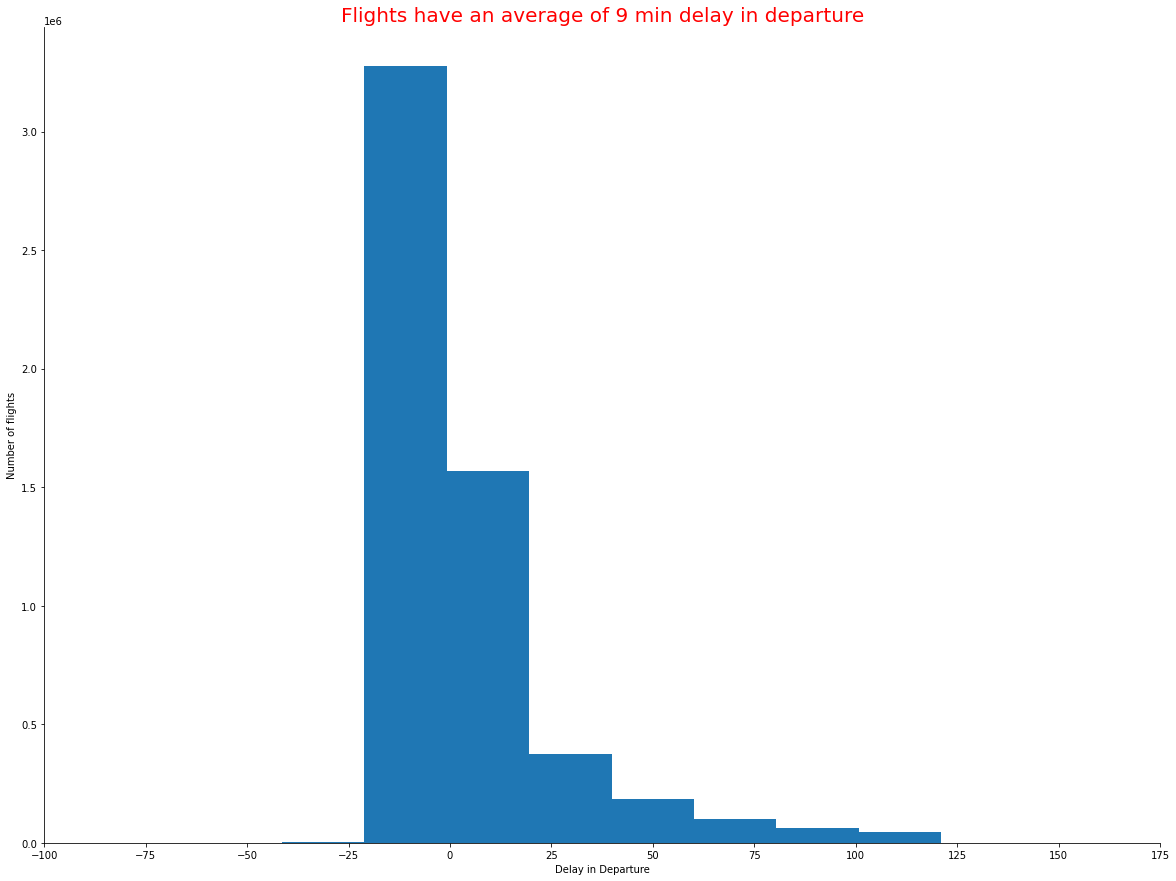

In [53]:
fig=plt.figure(figsize=(20,15))
ax=plt.axes()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.hist(plot_delay,color='tab:blue')
plt.xticks(range(-100,200,25))
plt.xlabel("Delay in Departure")
plt.ylabel("Number of flights")
plt.title("Flights have an average of 9 min delay in departure",color='red',size=20)

plt.show()

In [54]:
threshold=flights.ARRIVAL_DELAY.quantile(q=0.999)
Arrival_delay=flights[flights.ARRIVAL_DELAY<=threshold]["ARRIVAL_DELAY"]
Arrival_delay.mean()

3.874707926222751

(array([1.602700e+04, 3.929343e+06, 1.368295e+06, 2.264520e+05,
        8.971800e+04, 4.016700e+04, 1.986100e+04, 9.973000e+03,
        5.420000e+03, 3.062000e+03]),
 array([-87. , -41.5,   4. ,  49.5,  95. , 140.5, 186. , 231.5, 277. ,
        322.5, 368. ]),
 <BarContainer object of 10 artists>)

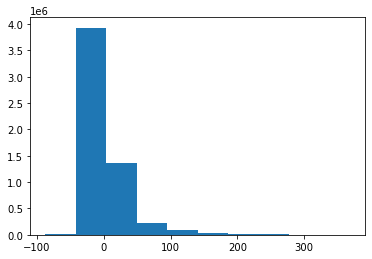

In [55]:
plt.hist(Arrival_delay)


In [56]:
total_delay=flights.ARRIVAL_DELAY + flights.DEPARTURE_DELAY

In [57]:
total_delay

0         -33.0
1         -17.0
2           3.0
3         -14.0
4         -22.0
           ... 
5819074   -30.0
5819075   -20.0
5819076   -17.0
5819077   -16.0
5819078    17.0
Length: 5819079, dtype: float64

In [58]:
#plt.hist(total_delay)

In [59]:
total_delay.min()

-162.0

In [60]:
thold=total_delay.quantile(q=0.999)

In [61]:
total_delay=total_delay[total_delay<thold]

<BarContainer object of 838 artists>

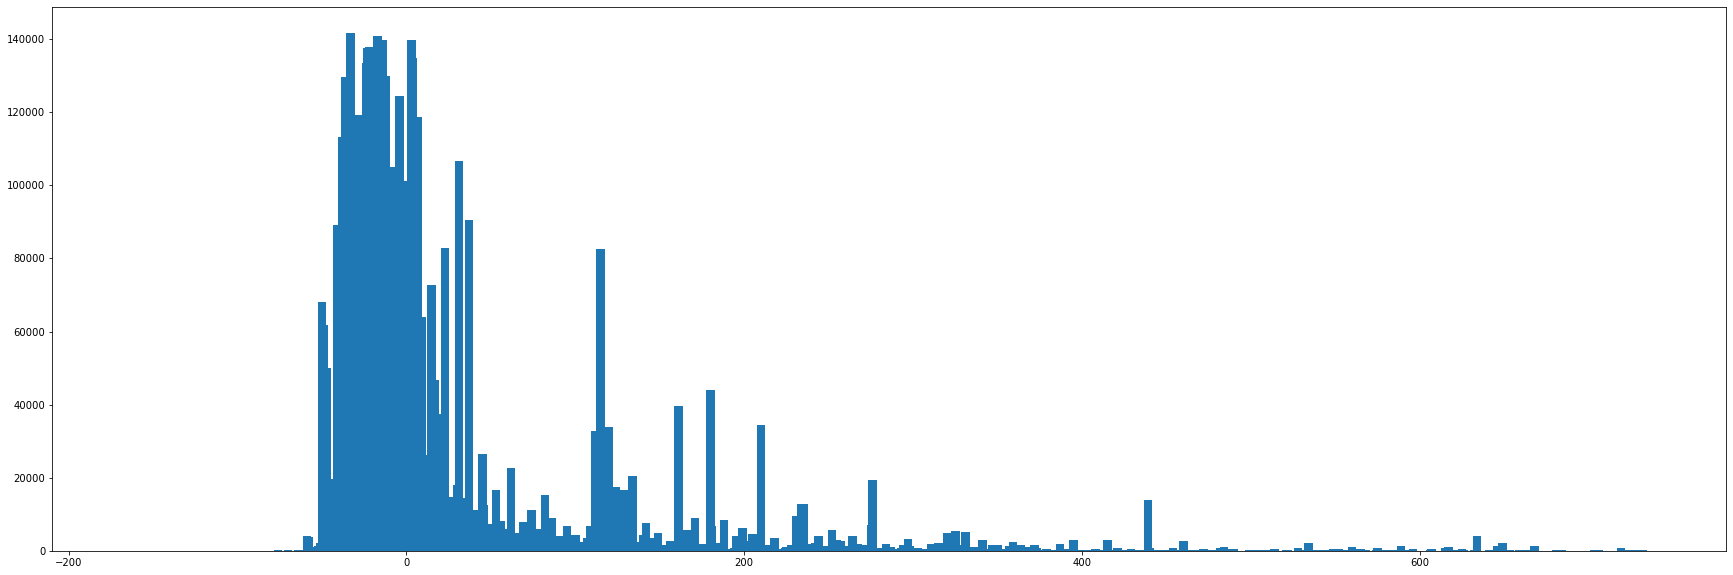

In [62]:
plt.figure(figsize=(30,10))
plt.bar(total_delay.unique(),total_delay.value_counts(),width=5)

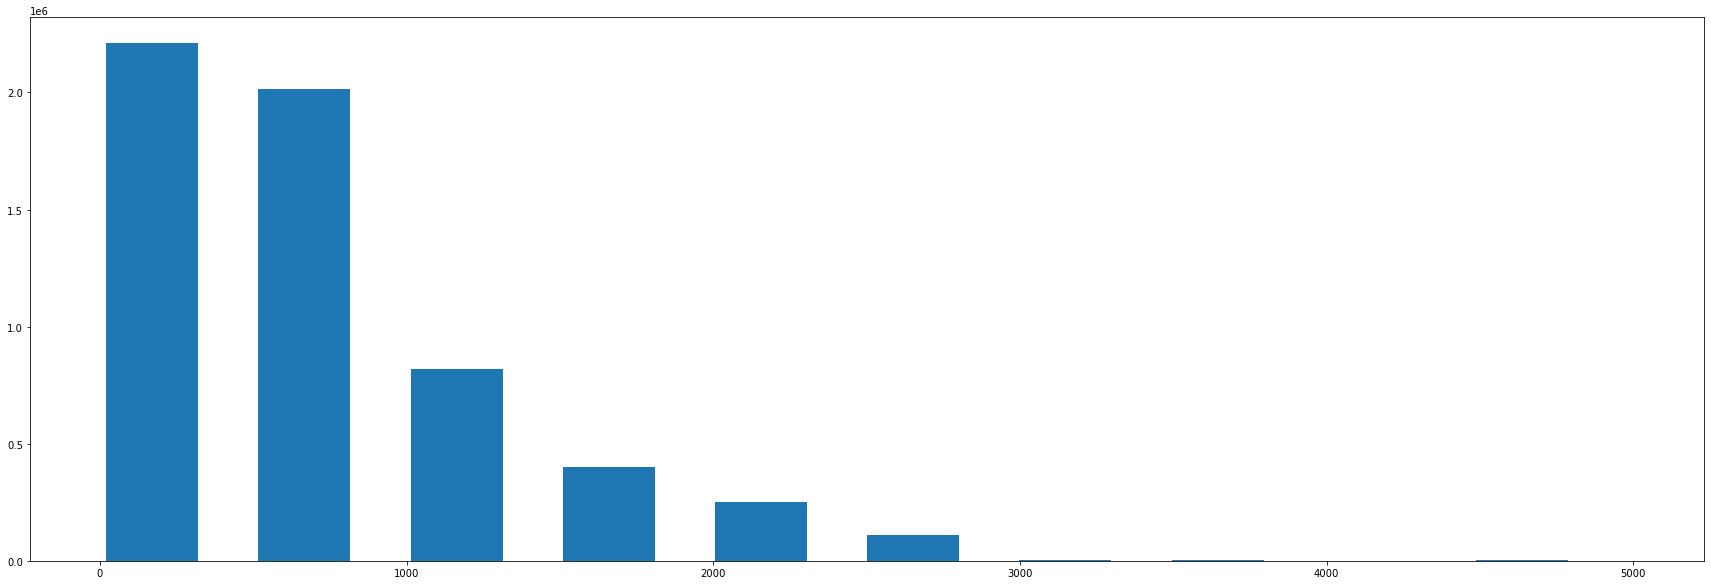

In [63]:
plt.figure(figsize=(30,10))
plt.hist(flights.DISTANCE,width=300)
plt.show()

In [64]:
df=flights[["ARRIVAL_DELAY","DEPARTURE_DELAY"]]

In [65]:
df.corr() 

,ARRIVAL_DELAY,DEPARTURE_DELAY
ARRIVAL_DELAY,1.000000,0.944672
DEPARTURE_DELAY,0.944672,1.000000


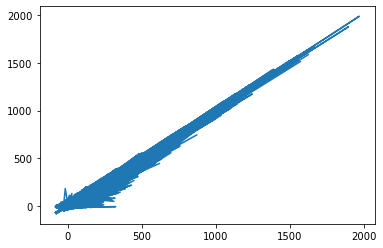

In [66]:
#there is a Strong correlation between DEPARTURE DELAY AND ARRIVAL DELAY we can see that with a scatter plot too
plt.plot(df.ARRIVAL_DELAY,df.DEPARTURE_DELAY)

In [67]:
# organising data to make it easier to load into a model
flights['DATE'] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])


In [73]:
def format_hour(var):
    if(pd.isnull(var)):
        return np.nan
    else:
        if var==2400: var=0
        var='{0:04d}'.format(int(var))
        rettime=datetime.time(int(var[0:2]),int(var[2:4]))
        return rettime
def combine_date_time(x):
    if(pd.isnull(x[0]) or pd.isnull(x[1])):
        return np.nan
    else:
        return datetime.datetime.combine(x[0],x[1])
def flight_time(df,col):
    list_series=[]
    for index,cols in df[['DATE',col]].iterrows():
        if pd.isnull(cols[1]):
            list_series.append(np.nan)
        elif float(cols[1]) == 2400:
            cols[0] += datetime.timedelta(days=1)
            cols[1] = datetime.time(0,0)
            list_series.append(combine_date_time(cols))
        else:
            cols[1] = format_hour(cols[1])
            list_series.append(combine_date_time(cols))
    return pd.Series(list_series)

In [69]:
#flights['DATE']
flights['SCHEDULED_DEPARTURE'] = flight_time(flights, 'SCHEDULED_DEPARTURE')
flights['DEPARTURE_TIME'] = flights['DEPARTURE_TIME'].apply(format_hour)
flights['SCHEDULED_ARRIVAL'] = flights['SCHEDULED_ARRIVAL'].apply(format_hour)
flights['ARRIVAL_TIME'] = flights['ARRIVAL_TIME'].apply(format_hour)

In [70]:
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                       'MONTH','DAY','DAY_OF_WEEK','DATE', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'AIR_TIME']
flights.drop(variables_to_remove, axis = 1, inplace = True)
flights = flights[['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
        'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
        'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
        'SCHEDULED_TIME', 'ELAPSED_TIME']]

In [74]:
flights=flights.dropna()

In [75]:
abbr_companies=airlines.set_index('IATA_CODE')['AIRLINE'].to_dict()

In [76]:
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}

In [80]:
global_stats=flights['DEPARTURE_DELAY'].groupby(flights['AIRLINE']).apply(get_stats).unstack()
global_stats = global_stats.sort_values('count')
global_stats

,min,max,count,mean
AIRLINE,,,,
VX,-24.0,644.0,61248.0,8.993486
HA,-27.0,1433.0,76041.0,0.469918
F9,-46.0,1112.0,90090.0,13.303352
NK,-37.0,836.0,115193.0,15.883101
AS,-82.0,963.0,171439.0,1.718926
US,-28.0,759.0,194223.0,6.081000
B6,-31.0,1006.0,262042.0,11.442467
MQ,-36.0,1544.0,278791.0,9.967187
UA,-40.0,1314.0,507762.0,14.333056


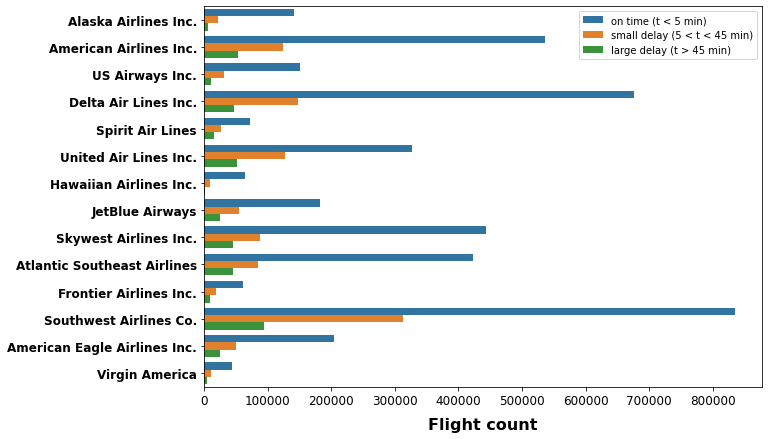

In [86]:
#_____________________________________________
# Function that define how delays are grouped

delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flights['DELAY_LEVEL'] = flights['DEPARTURE_DELAY'].apply(delay_type)

#____________________________________________________
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="AIRLINE", hue='DELAY_LEVEL', data=flights)


# Replace the abbreviations by the full names of the companies and set the labels


labels = [abbr_companies[item.get_text()] for item in ax.get_yticklabels()]
ax.set_yticklabels(labels)
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'bold', rotation = 0);
ax.yaxis.label.set_visible(False)
plt.xlabel('Flight count', fontsize=16, weight = 'bold', labelpad=10)



L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()